In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
dfx=pd.read_csv('xdata.csv') #importing Datasets
dfy=pd.read_csv('ydata.csv')

In [32]:
# X(xdata) contains the scattered points(x,y) / positions of the diffrent points
# Y(ydata) contains the digits/labels/classes(for ydata it only has 0 & 1)


X=dfx.values
Y=dfy.values

X=X[:,1:] # Slicing out 1st and 2nd column (removing 0th column which is not required)
Y=Y[:,1:].reshape((-1,))

print(X)
print(X.shape)
print(Y.shape)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038  3.35192483]
 

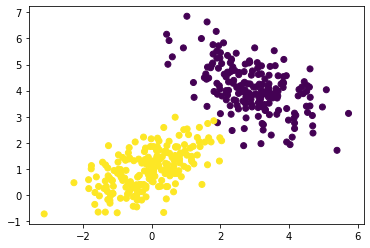

In [33]:
plt.scatter(X[:,0],X[:,1],c=Y) #Ploting graph using scatter
plt.show()

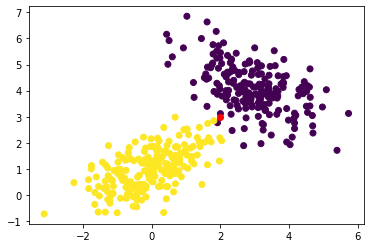

In [34]:
query_x=np.array([2,3]) #Taking a query point for the graph
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red') #Marking a query point(red) on the graph
plt.show()

In [35]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2)) #Calculating distance between x1(query point) and x2(nearest point) 

def knn(X,Y,queryPoint,k=5):
    
    vals=[] #Declaring empty list to store all the distances between the query point and the nearest neighbour points to it.
    
    m=X.shape[0]
    
    for i in range(m): #Iterating over the shape of X
        d=dist(queryPoint,X[i]) #Calculating distance between the query point and the nearest neighbour point.
        vals.append((d,Y[i])) #Saving distance,and the digit( 1 or 0)
    
    vals=sorted(vals) #Sorting vals in assending order to get shortest distance first(at 0th position of list)
    vals=vals[:k] #Slicing vals upto the value of K(K=5)
        
    vals=np.array(vals) #Converting vals to a numpy array
    
   # print(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)#Removing distance column & saving labels(0 & 1) with their no.of occurance
    print(new_vals) #new_vals 0th col contains digits(0,1) & 1st col contains the no. of occurance of that digit
    
    index=new_vals[1].argmax() #Finding the maximum no.of counts of a digit which is at 1st col (argmax is used to find the max)
    pred=new_vals[0][index] #Predicting the nearest digit on basic of index(maximum no. of counts of that digit)
    
    return pred

In [36]:
knn(X,Y,query_x)

(array([0., 1.]), array([3, 2], dtype=int64))


0.0

#MNIST DataSets

In [37]:
#train.csv contains 42000 rows(42000 diffrent pictures of handwriten digits) , 785 cols(label,28*28=784 pixels of the digits).
# pixels are stored in the form of binary array(0,1) where dark pixel is denoted as 1 and light pixel as 0.

df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [38]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [39]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Create Numpy Array
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [42]:
X=data[:,1:] #[:, 1:] - Selecting all rows, removing the first the column(0th col) (X contains all the digits pixel values)
Y=data[:,0] #[:, 0] - Selecting all rows, and the first the column(0th col) (Y contains all the labels)

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [44]:
split=int(0.8*X.shape[0]) #Spliting 80% of the data
print(split)

33600


In [45]:
#[:split,:] - From 0-split rows, : means all col
#[split:,:] - From split-last row, : means all col

X_train=X[:split,:]  #Spliting 80%(0-33600 rows, all pixel columns) of the traning data for all handwritten digits pixels - X
Y_train=Y[:split]    #Spliting 80%(0-33600 rows) of the traning data for the labels - Y
X_test=X[split:,:]   #Spliting 20%(33600-42000 rows,all pixel columns) of the testing data for all handwritten digits pixels - X
Y_test=Y[split:]     #Spliting 20%(33600-42000 rows) of the testing data for the labels - Y

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [46]:
def drawImg(sample):
    img=sample.reshape((28,28)) #To make complete image from pixels(joining all the pixels to built that one image)
    plt.imshow(img,cmap='gray') #To change the image from colour to grey (BGR by default)
    plt.show()

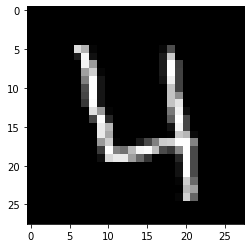

4


In [47]:
drawImg(X_train[3]) #To draw image at 3rd position(row) of the traning data of X
print(Y_train[3]) #Printing label at 3rd position of the traning data of Y for the image.

#Making Prediction

In [50]:
pred=knn(X_train,Y_train,X_test[98]) #Traning to predict the digit of a index
print(pred)

(array([7.]), array([5], dtype=int64))
7.0


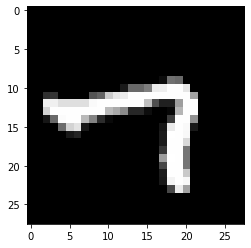

7


In [51]:
drawImg(X_test[98]) #Testing for the predicted digit of that particular index
print(Y_test[98])